# Linear Regression

Using the `solubility` data from `AppliedPredictiveModeling` package

[1] "solTestX"       "solTestXtrans"  "solTestY"       "solTrainX"     
[5] "solTrainXtrans" "solTrainY"

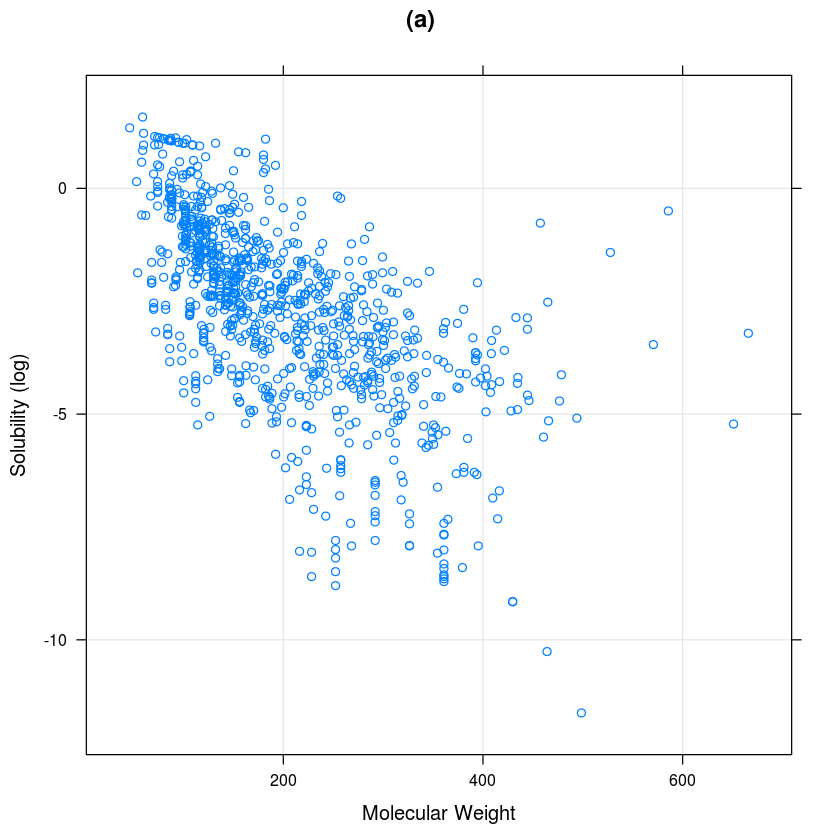

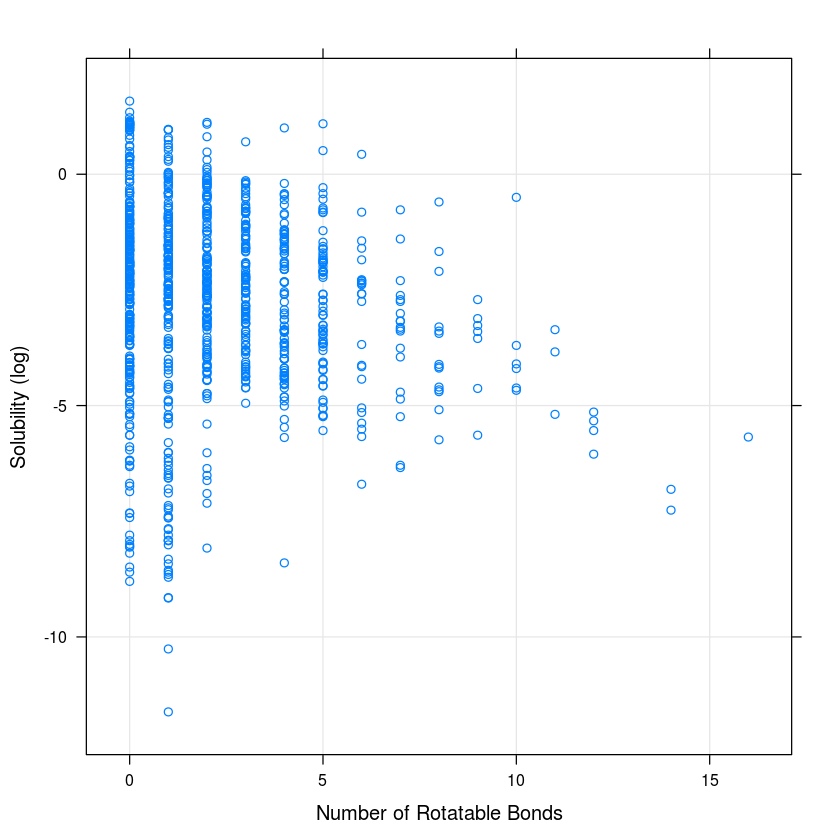

Loading required package: ggplot2
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“at  -0.0024793”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“radius  6.1471e-06”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“all data on boundary of neighborhood. make span bigger”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“pseudoinverse used at -0.0024793”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“neighborhood radius 0.0024793”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“reciprocal condition number  1”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“zero-width neighborhood. make span bigger”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“at  -0.0024793”Warning message in simpleLoess(y, x, w

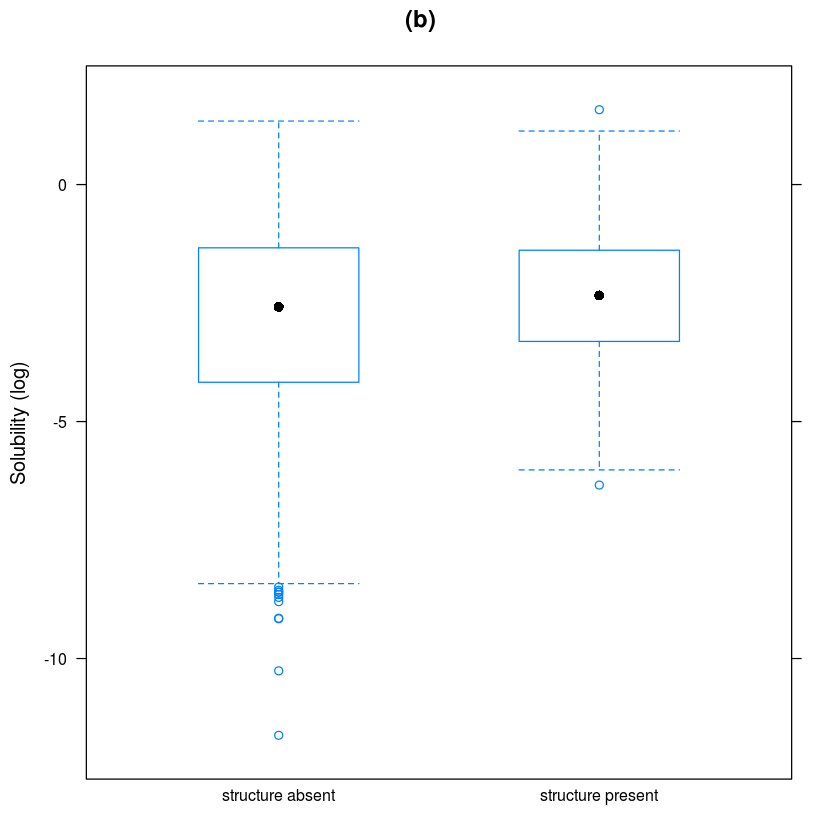

ERROR: Error in library(corrplot): there is no package called ‘corrplot’


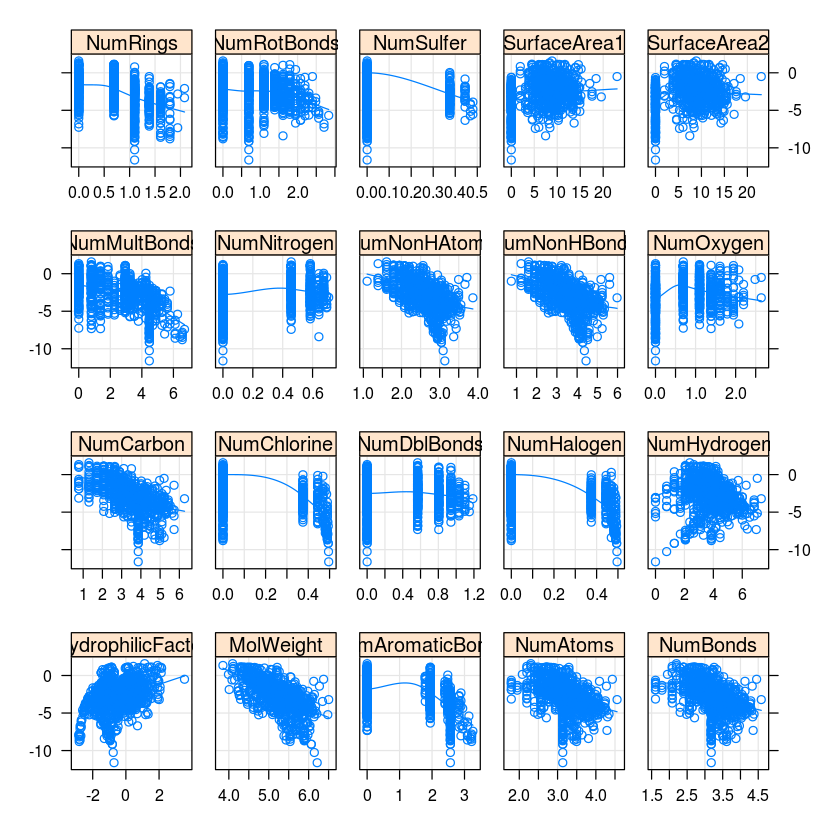

In [1]:
library(AppliedPredictiveModeling)
data(solubility)

# The data objects begin with "sol":
ls(pattern = "^sol")
library(lattice)

### Some initial plots of the data

xyplot(solTrainY ~ solTrainX$MolWeight, type = c("p", "g"),
       ylab = "Solubility (log)",
       main = "(a)",
       xlab = "Molecular Weight")
xyplot(solTrainY ~ solTrainX$NumRotBonds, type = c("p", "g"),
       ylab = "Solubility (log)",
       xlab = "Number of Rotatable Bonds")
bwplot(solTrainY ~ ifelse(solTrainX[,100] == 1, 
                          "structure present", 
                          "structure absent"),
       ylab = "Solubility (log)",
       main = "(b)",
       horizontal = FALSE)

### Find the columns that are not fingerprints (i.e. the continuous
### predictors). grep will return a list of integers corresponding to
### column names that contain the pattern "FP".

notFingerprints <- grep("FP", names(solTrainXtrans))

library(caret)
featurePlot(solTrainXtrans[, -notFingerprints],
            solTrainY,
            between = list(x = 1, y = 1),
            type = c("g", "p", "smooth"),
            labels = rep("", 2))

library(corrplot)

### We used the full namespace to call this function because the pls
### package (also used in this chapter) has a function with the same
### name.

corrplot::corrplot(cor(solTrainXtrans[, -notFingerprints]), 
                   order = "hclust", 
                   tl.cex = .8)
nrow(trainData)

The data has 228 columns which correspond to predictors (chemical descriptor). The rows correspond to compounds

In [2]:
set.seed(2)
sample(names(solTrainX),8)

[1] "FP043"        "FP160"        "FP130"        "FP038"        "NumBonds"    
[6] "NumNonHAtoms" "FP029"        "FP185"

## Ordinary Linear Regression

The primary function for creating regression models using simple least squares is `lm`. It takes a formula and a data frame for input. Both predictors and outcome must be in the data frame

In [3]:
trainingData <- solTrainXtrans
## Add the solibility outcome
trainingData$Solubility <- solTrainY

# Fit a model with all predictors
lmFitAllPredictors <- lm(Solubility ~ ., data=trainingData)

An intercept term is automatically added to the model

In [4]:
# Summary
summary(lmFitAllPredictors)


Call:
lm(formula = Solubility ~ ., data = trainingData)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75620 -0.28304  0.01165  0.30030  1.54887 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.431e+00  2.162e+00   1.124 0.261303    
FP001              3.594e-01  3.185e-01   1.128 0.259635    
FP002              1.456e-01  2.637e-01   0.552 0.580960    
FP003             -3.969e-02  1.314e-01  -0.302 0.762617    
FP004             -3.049e-01  1.371e-01  -2.223 0.026520 *  
FP005              2.837e+00  9.598e-01   2.956 0.003223 ** 
FP006             -6.886e-02  2.041e-01  -0.337 0.735917    
FP007              4.044e-02  1.152e-01   0.351 0.725643    
FP008              1.121e-01  1.636e-01   0.685 0.493331    
FP009             -8.242e-01  8.395e-01  -0.982 0.326536    
FP010              4.193e-01  3.136e-01   1.337 0.181579    
FP011              5.158e-02  2.198e-01   0.235 0.814503    
FP012             -1.346e-02  1

RMSE and R^2 are 0.5524 and 0.9446 respectively

The `predict` method is use to predict the model solubility for new samples

In [5]:
lmPred1 <- predict(lmFitAllPredictors, solTestXtrans)
head(lmPred1)

20          21          23          25          28          31 
 0.99370933  0.06834627 -0.69877632  0.84796356 -0.16578324  1.40815083

Collect the observed and predicted outcome into a data frame

In [6]:
lmValues1 <- data.frame(obs = solTestY, pred = lmPred1)
library(caret)
defaultSummary(lmValues1)

RMSE  Rsquared 
0.7455802 0.8722236

#### Using Robust Linear Model 

The `rlm` from the `MASS` package can also be used to predict the outcome. It uses Huber's approach

The `train` function generates a resampling estimate of performance.

In [7]:
library(MASS)
rlmFitAllPredictors <- rlm(Solubility ~ ., data = trainingData)

ctrl <- trainControl(method = "cv", number = 10)
set.seed(100)
lmFit1 <- train(x = solTrainXtrans, y = solTrainY,
               method = "lm", trControl = ctrl)
lmFit1

Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”

Linear Regression 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 856, 856, 856, 855, ... 
Resampling results:

  RMSE       Rsquared 
  0.7090955  0.8820357

Tuning parameter 'intercept' was held constant at a value of TRUE
 

#### Residual distribution

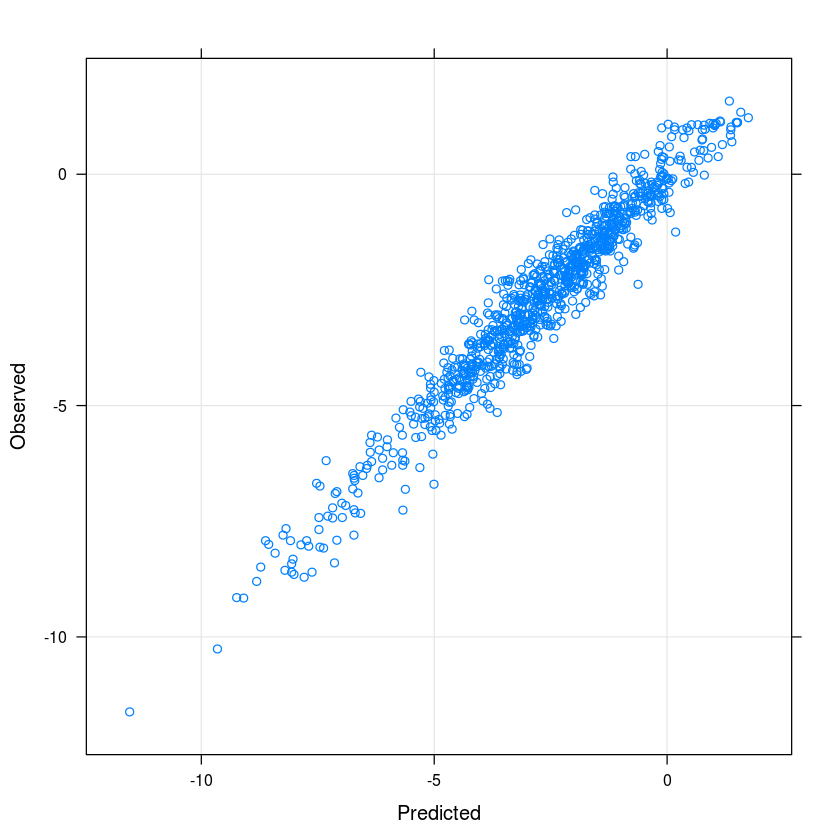

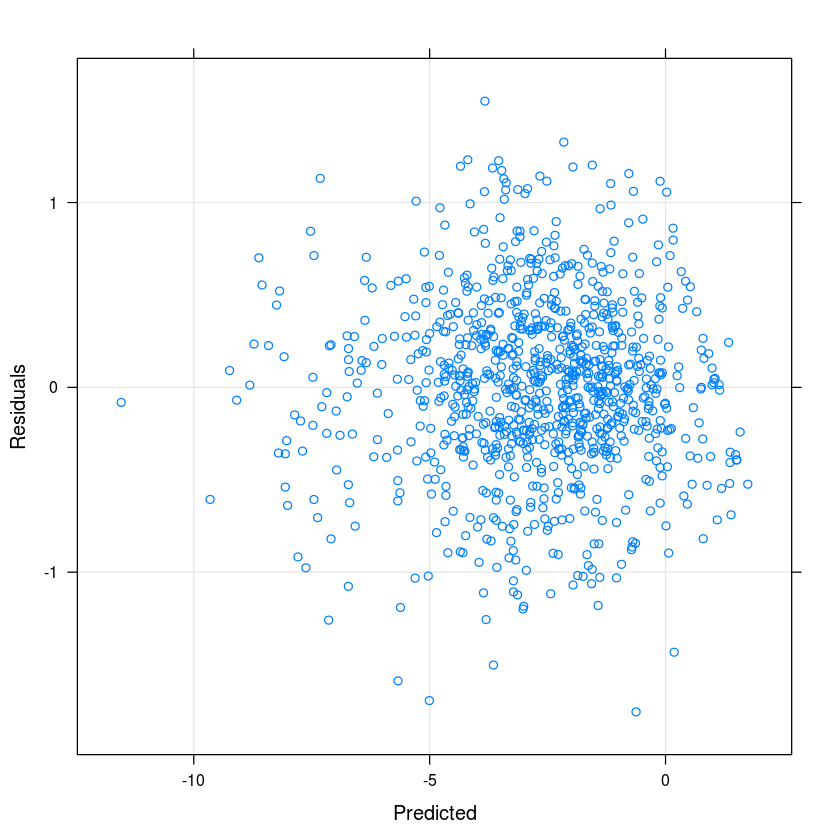

In [8]:
xyplot(solTrainY ~ predict(lmFit1),
      ## plot the pionts (type = 'p') and a background grid ('g'))
       type = c("p", "g"),
       xlab = "Predicted", ylab = "Observed")
xyplot(resid(lmFit1) ~ predict(lmFit1),
      type = c("p","g"),
      xlab = "Predicted", ylab = "Residuals")

### Correlated predictors

We can build a small model withthout extremely high correlations between the predictors.

In [11]:
tooHigh <- findCorrelation(cor(solTrainXtrans), 0.9)
trainXfiltered <- solTrainXtrans[, -tooHigh]
testXfiltered  <-  solTestXtrans[, -tooHigh]

set.seed(100)
lmFiltered <- train(x = trainXfiltered, y = solTrainY,
                method = "lm",
                trControl = ctrl)
lmFiltered

Linear Regression 

951 samples
190 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 856, 856, 856, 855, ... 
Resampling results:

  RMSE       Rsquared 
  0.7102684  0.8806887

Tuning parameter 'intercept' was held constant at a value of TRUE
 

In [ ]:
Save the test set results in a data frame  

In [20]:
testResults <- data.frame(obs = solTestY,
                          Linear_Regression = predict(lmFiltered, testXfiltered))

### Robust Linear Regression

The `train` function employs `rlm` for robust linear regression

In [12]:
set.seed(100)
rlmPCA <- train(solTrainXtrans, solTrainY,
               method =  "rlm",
               preProcess = "pca",
               trControl = ctrl)
rlmPCA

Robust Linear Model 

951 samples
228 predictors

Pre-processing: principal component signal extraction (228), centered
 (228), scaled (228) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 856, 856, 856, 855, ... 
Resampling results across tuning parameters:

  intercept  psi           RMSE       Rsquared 
  FALSE      psi.huber     2.8333791  0.8526509
  FALSE      psi.hampel    2.8333831  0.8526416
  FALSE      psi.bisquare  2.8329591  0.8529059
   TRUE      psi.huber     0.7886933  0.8525202
   TRUE      psi.hampel    0.7874969  0.8529702
   TRUE      psi.bisquare  0.7931929  0.8508533

RMSE was used to select the optimal model using  the smallest value.
The final values used for the model were intercept = TRUE and psi = psi.hampel. 

## Partial Least Squares

The `pls` package has functions for PLS and PCR. By default it uses Dayal and MacGregor kernel algorithm. The other algorithms can be specified usign the `method` argument. Values include `oscorespls, simpls and widekernelpls`.

In [15]:
library(pls)
plsFit <- plsr(Solubility ~ ., data =  trainingData)


Attaching package: ‘pls’

The following object is masked from ‘package:stats’:

    loadings



The number of components can be fixed using `ncomp` argument. The default would use the maximum number of components.

In [18]:
predict(plsFit, solTestXtrans[1:5,],ncomp = 1:2)

, , 1 comps

   Solubility
20  -1.789335
21  -1.427551
23  -2.268798
25  -2.269782
28  -1.867960

, , 2 comps

   Solubility
20  0.2520469
21  0.3555028
23 -1.8795338
25 -0.6848584
28 -1.5531552

The plsr function has options for either K-fold or leave-one-out cross-validation or the PLS algorithm to use such as SIMPLS.

There are several helper functions to extract PLS components, PLS scores, and other quantities.

Partial Least Squares 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 856, 856, 856, 855, ... 
Resampling results across tuning parameters:

  ncomp  RMSE       Rsquared 
   1     1.7538831  0.2685980
   2     1.2685861  0.6192012
   3     1.0366211  0.7496923
   4     0.8371573  0.8351409
   5     0.7518609  0.8666081
   6     0.7158164  0.8778123
   7     0.6983701  0.8828469
   8     0.6900977  0.8861294
   9     0.6856767  0.8872430
  10     0.6846026  0.8876383
  11     0.6864161  0.8875316
  12     0.6847768  0.8885702
  13     0.6853780  0.8883839
  14     0.6865404  0.8883758
  15     0.6893466  0.8873987
  16     0.6871483  0.8879729
  17     0.6879380  0.8877794
  18     0.6889074  0.8872856
  19     0.6923948  0.8862986
  20     0.6934293  0.8861825

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was ncomp = 10. 

Principal Component Analysis 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 856, 856, 856, 855, ... 
Resampling results across tuning parameters:

  ncomp  RMSE       Rsquared  
   1     1.9799767  0.07333804
   2     1.6381719  0.36179122
   3     1.3623717  0.56310030
   4     1.3662387  0.56045326
   5     1.3397315  0.57731175
   6     1.2050361  0.65840053
   7     1.1694277  0.67713680
   8     1.1399566  0.69477209
   9     1.0455078  0.74400557
  10     0.9852041  0.77318164
  11     0.9679484  0.78188825
  12     0.9665260  0.78237124
  13     0.9553955  0.78757004
  14     0.9410046  0.79362566
  15     0.9407558  0.79354976
  16     0.8711861  0.82098841
  17     0.8705116  0.82155208
  18     0.8707655  0.82116452
  19     0.8702208  0.82140388
  20     0.8677578  0.82235216
  21     0.8137331  0.84400973
  22     0.8142543  0.84397830
  23     0.8107540  0.84518631
  24     0.8093987  0.84537202
  2

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' is a list, but does not have components 'x' and 'y'


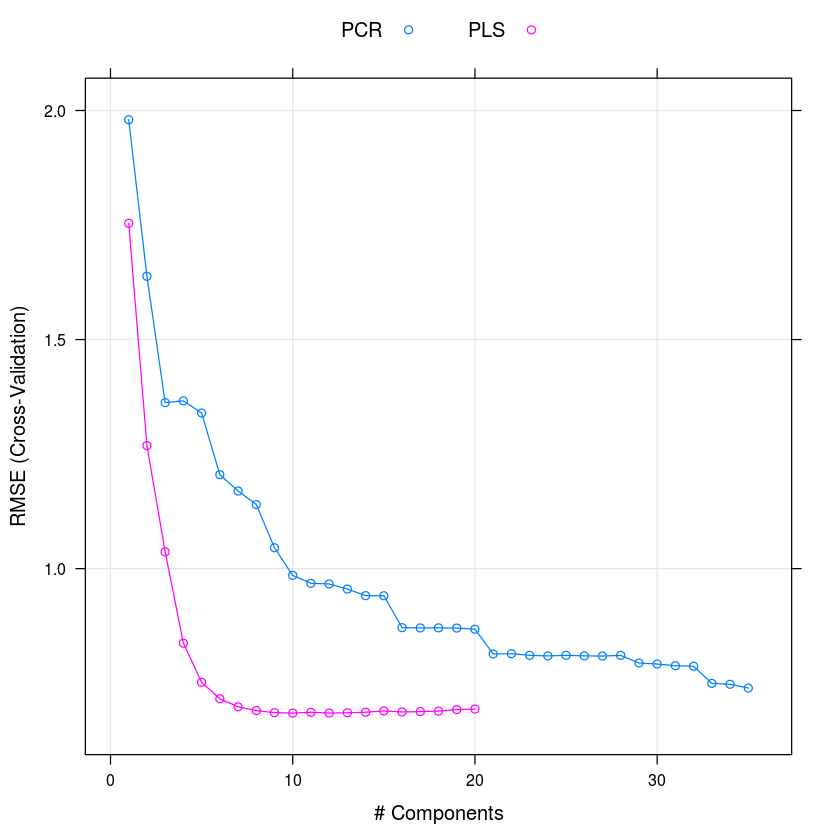

In [21]:
set.seed(100)
plsTune <- train(x = solTrainXtrans, y = solTrainY,
                 method = "pls",
                 tuneGrid = expand.grid(ncomp = 1:20),
                 trControl = ctrl)
plsTune

testResults$PLS <- predict(plsTune, solTestXtrans)

set.seed(100)
pcrTune <- train(x = solTrainXtrans, y = solTrainY,
                 method = "pcr",
                 tuneGrid = expand.grid(ncomp = 1:35),
                 trControl = ctrl)
pcrTune                  

plsResamples <- plsTune$results
plsResamples$Model <- "PLS"
pcrResamples <- pcrTune$results
pcrResamples$Model <- "PCR"
plsPlotData <- rbind(plsResamples, pcrResamples)

xyplot(RMSE ~ ncomp,
       data = plsPlotData,
       #aspect = 1,
       xlab = "# Components",
       ylab = "RMSE (Cross-Validation)",
       auto.key = list(columns = 2),
       groups = Model,
       type = c("o", "g"))

plsImp <- varImp(plsTune, scale = FALSE)
plot(plsImp, top = 25, scales = list(y = list(cex = .95)))

### Lasso

Lasso can be estimated using `lars` function in the `lars` package `enet` in the elasticnet package and `enet` in the glmnet package.

#### enet

For the enet function in the elasticnet library, the predictor data must be a matrix. The predictors should also be centered and scaled. This can be done using the `normalize` argument. The parameter `lambda` controls the ridge-regression penalty. Setting this value to 0  fits the lasso model.

In [24]:
library(elasticnet)
enetModel <- enet(x = as.matrix(solTrainXtrans), y = solTrainY, 
                 lambda = 0.01, normalize = TRUE)

Loading required package: lars
Loaded lars 1.2



In [25]:
enetPred <- predict(enetModel, newx = as.matrix(solTestXtrans),
                   s = 0.1, mode = "fraction",
                   type = "fit")
# A list is returned with several items:
names(enetPred)

[1] "s"        "fraction" "mode"     "fit"

The predicted values are in the fit component

In [26]:
head(enetPred$fit)

20          21          23          25          28          31 
-0.60186178 -0.42226814 -1.20465564 -1.23652963 -1.25023517 -0.05587631

The `predict` method is used with type = "coefficients" to determine which predictors were used in the model

In [27]:
enetCoef <- predict(enetModel, newx = as.matrix(solTestXtrans),
                   s = 0.1, mode = "fraction",
                   type = "coefficients")
tail(enetCoef$coefficients)

NumChlorine        NumHalogen          NumRings HydrophilicFactor 
       0.00000000        0.00000000        0.00000000        0.12678967 
     SurfaceArea1      SurfaceArea2 
       0.09035596        0.00000000

#### Tuning

Tune model over custom penalties

Ridge Regression 

951 samples
228 predictors

Pre-processing: centered (228), scaled (228) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 856, 856, 856, 855, ... 
Resampling results across tuning parameters:

  lambda       RMSE       Rsquared 
  0.000000000  0.7090477  0.8820583
  0.007142857  0.6957508  0.8853990
  0.014285714  0.6894049  0.8874979
  0.021428571  0.6873000  0.8883313
  0.028571429  0.6870753  0.8886212
  0.035714286  0.6879091  0.8886211
  0.042857143  0.6894240  0.8884481
  0.050000000  0.6914183  0.8881655
  0.057142857  0.6937736  0.8878107
  0.064285714  0.6964152  0.8874072
  0.071428571  0.6992939  0.8869709
  0.078571429  0.7023759  0.8865125
  0.085714286  0.7056371  0.8860394
  0.092857143  0.7090600  0.8855571
  0.100000000  0.7126315  0.8850695

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was lambda = 0.02857143. 

Elasticnet 

951 samples
228 predictors

Pre-processing: centered (228), scaled (228) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 856, 856, 856, 855, ... 
Resampling results across tuning parameters:

  lambda  fraction  RMSE       Rsquared 
  0.00    0.05      0.8735418  0.8342587
  0.00    0.10      0.6921765  0.8856866
  0.00    0.15      0.6787530  0.8896974
  0.00    0.20      0.6790163  0.8900895
  0.00    0.25      0.6842223  0.8886762
  0.00    0.30      0.6882650  0.8876602
  0.00    0.35      0.6958113  0.8855268
  0.00    0.40      0.7016635  0.8838505
  0.00    0.45      0.7035060  0.8832955
  0.00    0.50      0.7026123  0.8835973
  0.00    0.55      0.7023838  0.8836760
  0.00    0.60      0.7021567  0.8837800
  0.00    0.65      0.7021152  0.8838458
  0.00    0.70      0.7025643  0.8837488
  0.00    0.75      0.7033553  0.8835491
  0.00    0.80      0.7040813  0.8833533
  0.00    0.85      0.7049459  0.8831377
  0.00    0.90      0.7060243 

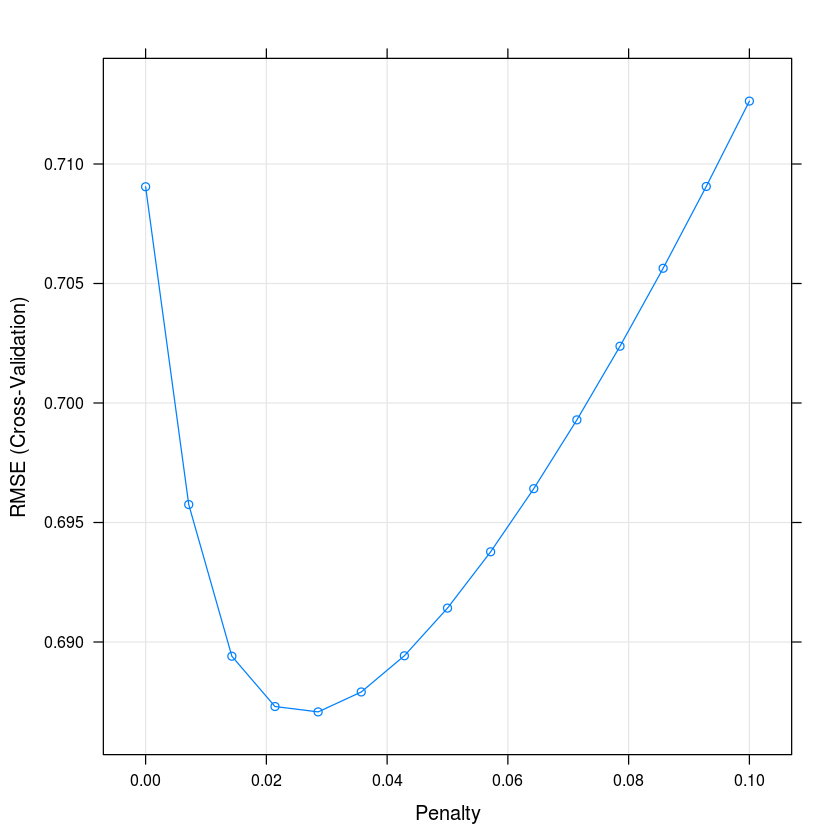

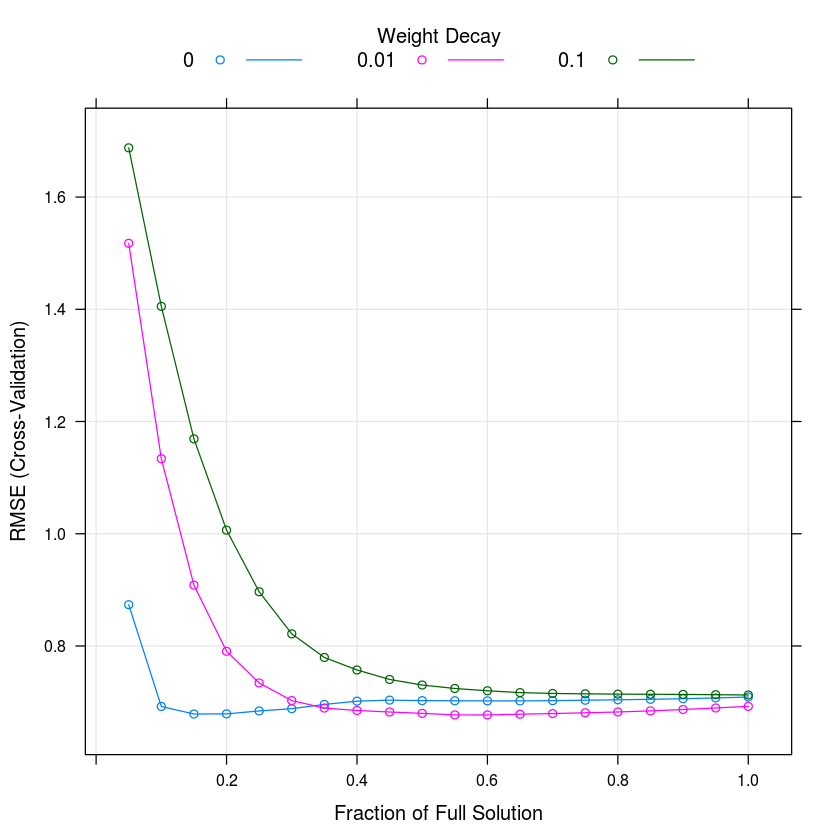

In [28]:
## The text used the elasticnet to obtain a ridge regression model.
## There is now a simple ridge regression method.

ridgeGrid <- expand.grid(lambda = seq(0, .1, length = 15))

set.seed(100)
ridgeTune <- train(x = solTrainXtrans, y = solTrainY,
                   method = "ridge",
                   tuneGrid = ridgeGrid,
                   trControl = ctrl,
                   preProc = c("center", "scale"))
ridgeTune

print(update(plot(ridgeTune), xlab = "Penalty"))


enetGrid <- expand.grid(lambda = c(0, 0.01, .1), 
                        fraction = seq(.05, 1, length = 20))
set.seed(100)
enetTune <- train(x = solTrainXtrans, y = solTrainY,
                  method = "enet",
                  tuneGrid = enetGrid,
                  trControl = ctrl,
                  preProc = c("center", "scale"))
enetTune

plot(enetTune)
